In [1]:
from numpy import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from plot_service import *

In [3]:
train_file = 'datasets/train.csv'

X = loadtxt(train_file, usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), unpack=True, delimiter=',').T
Y = loadtxt(train_file, unpack=True, usecols=(11), delimiter=',')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print('Data loaded!')

Data loaded!


In [4]:
model = RandomForestRegressor(n_estimators = 10, random_state = 42, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

building tree 1 of 10building tree 2 of 10
building tree 3 of 10
building tree 4 of 10

building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.7s finished
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.5s finished


In [5]:
score = model.score(X_val, y_val)
print('Cross-Val Score:', score)

[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.4s finished


Cross-Val Score: 0.912745228071


In [6]:
pred = preds.reshape(len(preds))
real = y_test

plot_table(real, pred)

|     Real |   Predict |
|----------+-----------|
| 0.280669 | 0.288452  |
| 0.077872 | 0.0913407 |
| 0.104906 | 0.102565  |
| 0.275276 | 0.250073  |
| 0.485488 | 0.437055  |
| 0.114552 | 0.173941  |
| 0.07531  | 0.0877116 |
| 0.034378 | 0.0551595 |
| 0.025761 | 0.0193767 |
| 0.138474 | 0.135086  |
| 0.09235  | 0.0488354 |
| 0.103453 | 0.0958228 |
| 0.055177 | 0.0729398 |
| 0.054338 | 0.0806469 |
| 0.124842 | 0.0905211 |
| 0.706    | 0.5744    |
| 0.253669 | 0.245162  |
| 0.085852 | 0.124198  |
| 0.132435 | 0.144847  |
| 0.148348 | 0.139499  |
| 0.173093 | 0.169698  |
| 0.089478 | 0.0875215 |
| 0.390088 | 0.378243  |
| 0.160668 | 0.154465  |
| 0.211254 | 0.173794  |
| 0.157654 | 0.153765  |
| 0.159079 | 0.132952  |
| 0.109328 | 0.102518  |
| 0.13916  | 0.105828  |
| 0.071529 | 0.0834521 |
| 0.128429 | 0.130889  |
| 0.331388 | 0.347014  |
| 0.394787 | 0.363086  |
| 0.187083 | 0.0706392 |
| 0.092121 | 0.0799027 |
| 0.067879 | 0.0323532 |
| 0.120067 | 0.109383  |
| 0.045427 | 0.0439706 |


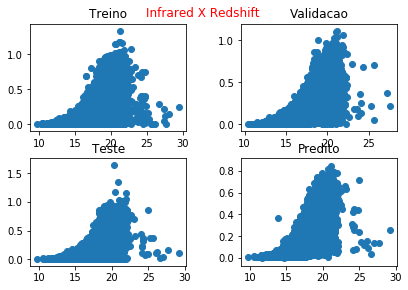

In [8]:
plot_scatter(X_train, y_train, X_val, y_val, X_test, y_test, preds, show_only=True)

### Adhafera:

![](rf_redshift.png)

In [9]:
errors = abs(pred - real)
print('Mean Absolute Error:', round(mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.02 degrees.


In [10]:
mape = 100 * (errors / real)
accuracy = 100 - mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 76.54 %.


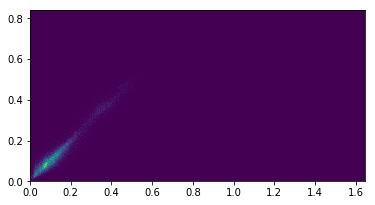

In [11]:
plot_hm(real, pred, show_only=True)

### Adhafera:

![](rf_hm.png)